<a href="https://colab.research.google.com/github/th4ruka/solar-power-generation-prediction/blob/main/SolarPowerGenerationPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Solar Power Generation Forecast System for a Power Plant**
**Group 13**

**Authors:**

* Pavith L.P.T. (EG/2019/3694)
* Ranaweera S.C. (EG/2019/3714)

---
The project Solar Power Generation Prediction focuses on analyzing data from a solar power plant. The project aims to address key concerns at the solar power plant, including predicting power generation for the next few days. In the context of solar power generation, when photons interact with photovoltaic cells, they excite electrons, leading to the production of direct current (DC) energy. Subsequently, inverters are utilized to convert this DC power into alternating current (AC) for distribution and use in various networks, aligning with the design of buildings for AC transport and utilization.

 **About the Dataset:**
* Dataset consist of 2 tables:
  - Plant_2_Generation_Data.csv
  - Plant_2_Weather_Sensor_Data.csv

* Plant_2_Generation_Data consist of following features:
  - DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
  - PLANT_ID - Power plant ID.
  - SOURCE_KEY - Stands for the inverter id.
  - DC_POWER - Amount of DC power generated (kW) by the inverter (source_key) in this 15 minute interval.
  - AC_POWER - Amount of AC power generated (kW) by the inverter (source_key) in this 15 minute interval.
  - DAILY_YIELD - Cumulative sum of power generated on that day, till that point in time.
  - TOTAL_YIELD - Total yield for the inverter (source_key) till that point in time.

* Plant_2_Weather_Sensor_Data consist of the following features:
  - DATE_TIME - Date and time for each observation. Observations recorded at 15 minute intervals.
  - PLANT_ID - Power plant ID.
  - SOURCE_KEY - Stands for the sensor panel id. This is common for the entire file because there's only one sensor panel for collecting weather data the plant.
  - AMBIENT_TEMPERATURE - Ambient temperature at the plant.
  - MODULE_TEMPERATURE - There's a module (solar panel) attached to the sensor panel. This is the temperature reading for that module.
  - IRRADIATION - Amount of irradiation.


# Importing Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Importing the Dataset

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Load dataset from drive
generation_data = pd.read_csv('/content/drive/MyDrive/academics/ML_Project/Solar_Power_Plant/dataset/Plant_2_Generation_Data.csv')
weather_data = pd.read_csv('/content/drive/MyDrive/academics/ML_Project/Solar_Power_Plant/dataset/Plant_2_Weather_Sensor_Data.csv')

# Load uploaded dataset
# generation_data = pd.read_csv('Plant_2_Generation_Data.csv')
# weather_data = pd.read_csv('Plant_2_Weather_Sensor_Data.csv')

# Information about generation_data & weather_data

- In Generation_data, there are 67698 rows of data collected from each inverter (SOURCE_KEY) for each 15 minute time intervals. There are 22 inverters in the plant.

- Weather_data collected from a single set of sensor module which is common to the whole power plant. It collected 3259 rows of data on each 15 minute time interval.

## Information about generation_data

In [ ]:
generation_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67698 entries, 0 to 67697
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   DATE_TIME    67698 non-null  object 
 1   PLANT_ID     67698 non-null  int64  
 2   SOURCE_KEY   67698 non-null  object 
 3   DC_POWER     67698 non-null  float64
 4   AC_POWER     67698 non-null  float64
 5   DAILY_YIELD  67698 non-null  float64
 6   TOTAL_YIELD  67698 non-null  float64
dtypes: float64(4), int64(1), object(2)
memory usage: 3.6+ MB


In [ ]:
generation_data.describe() #statistics about generation_data

PLANT_ID      DC_POWER      AC_POWER   DAILY_YIELD   TOTAL_YIELD
count    67698.0  67698.000000  67698.000000  67698.000000  6.769800e+04
mean   4136001.0    246.701961    241.277825   3294.890295  6.589448e+08
std          0.0    370.569597    362.112118   2919.448386  7.296678e+08
min    4136001.0      0.000000      0.000000      0.000000  0.000000e+00
25%    4136001.0      0.000000      0.000000    272.750000  1.996494e+07
50%    4136001.0      0.000000      0.000000   2911.000000  2.826276e+08
75%    4136001.0    446.591667    438.215000   5534.000000  1.348495e+09
max    4136001.0   1420.933333   1385.420000   9873.000000  2.247916e+09

In [ ]:
generation_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  DC_POWER  AC_POWER  \
0  2020-05-15 00:00:00   4136001  4UPUqMRk7TRMgml       0.0       0.0   
1  2020-05-15 00:00:00   4136001  81aHJ1q11NBPMrL       0.0       0.0   
2  2020-05-15 00:00:00   4136001  9kRcWv60rDACzjR       0.0       0.0   
3  2020-05-15 00:00:00   4136001  Et9kgGMDl729KT4       0.0       0.0   
4  2020-05-15 00:00:00   4136001  IQ2d7wF4YD8zU1Q       0.0       0.0   

   DAILY_YIELD   TOTAL_YIELD  
0  9425.000000  2.429011e+06  
1     0.000000  1.215279e+09  
2  3075.333333  2.247720e+09  
3   269.933333  1.704250e+06  
4  3177.000000  1.994153e+07

In [ ]:
print(f'Number of unique inverters: {generation_data["SOURCE_KEY"].nunique()}') #number of unique source keys

Number of unique inverters: 22


## Information about weather_data

In [ ]:
weather_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3259 entries, 0 to 3258
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DATE_TIME            3259 non-null   object 
 1   PLANT_ID             3259 non-null   int64  
 2   SOURCE_KEY           3259 non-null   object 
 3   AMBIENT_TEMPERATURE  3259 non-null   float64
 4   MODULE_TEMPERATURE   3259 non-null   float64
 5   IRRADIATION          3259 non-null   float64
dtypes: float64(3), int64(1), object(2)
memory usage: 152.9+ KB


In [ ]:
weather_data.describe() #Statistics for weather data

PLANT_ID  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION
count     3259.0          3259.000000         3259.000000  3259.000000
mean   4136001.0            28.069400           32.772408     0.232737
std          0.0             4.061556           11.344034     0.312693
min    4136001.0            20.942385           20.265123     0.000000
25%    4136001.0            24.602135           23.716881     0.000000
50%    4136001.0            26.981263           27.534606     0.019040
75%    4136001.0            31.056757           40.480653     0.438717
max    4136001.0            39.181638           66.635953     1.098766

In [ ]:
weather_data.head()

DATE_TIME  PLANT_ID       SOURCE_KEY  AMBIENT_TEMPERATURE  \
0  2020-05-15 00:00:00   4136001  iq8k7ZNt4Mwm3w0            27.004764   
1  2020-05-15 00:15:00   4136001  iq8k7ZNt4Mwm3w0            26.880811   
2  2020-05-15 00:30:00   4136001  iq8k7ZNt4Mwm3w0            26.682055   
3  2020-05-15 00:45:00   4136001  iq8k7ZNt4Mwm3w0            26.500589   
4  2020-05-15 01:00:00   4136001  iq8k7ZNt4Mwm3w0            26.596148   

   MODULE_TEMPERATURE  IRRADIATION  
0           25.060789          0.0  
1           24.421869          0.0  
2           24.427290          0.0  
3           24.420678          0.0  
4           25.088210          0.0

# Data Preprocessing

## Merging generation_data and weather_data

In [ ]:
#Merge generation_data and weather_data on 'DATE_TIME'
df_solar = pd.merge(generation_data.drop(columns = ['PLANT_ID']), weather_data.drop(columns = ['PLANT_ID', 'SOURCE_KEY']), on='DATE_TIME')

In [ ]:
df_solar.head() # Merged dataframe

DATE_TIME       SOURCE_KEY  DC_POWER  AC_POWER  DAILY_YIELD  \
0  2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0       0.0  9425.000000   
1  2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0       0.0     0.000000   
2  2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0       0.0  3075.333333   
3  2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0       0.0   269.933333   
4  2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0       0.0  3177.000000   

    TOTAL_YIELD  AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0  2.429011e+06            27.004764           25.060789          0.0  
1  1.215279e+09            27.004764           25.060789          0.0  
2  2.247720e+09            27.004764           25.060789          0.0  
3  1.704250e+06            27.004764           25.060789          0.0  
4  1.994153e+07            27.004764           25.060789          0.0

In [ ]:
c = df_solar['AC_POWER'].corr(df_solar["DC_POWER"])
print("Correlation between AC_POWER and DC_POWER = {:.2f}".format(c))

Correlation between AC_POWER and DC_POWER = 1.00


<Axes: xlabel='AC_POWER', ylabel='DC_POWER'>

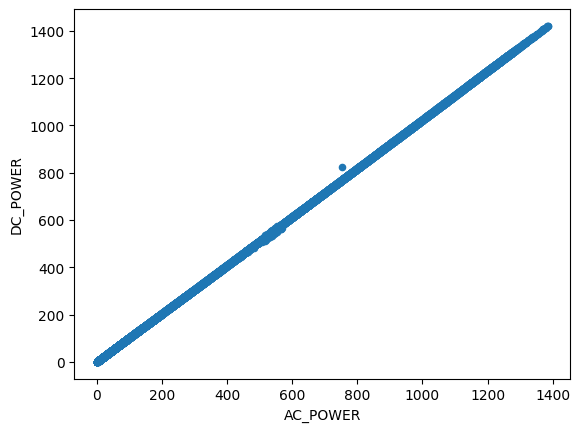

In [ ]:
df_solar.plot.scatter(x="AC_POWER", y="DC_POWER")

In [ ]:
# DC_POWER is highly correlated with AC_POWER. Therefore, DC_POWER is dropped.
df_solar = df_solar.drop(columns=["DC_POWER"])
df_solar.head()

DATE_TIME       SOURCE_KEY  AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
0  2020-05-15 00:00:00  4UPUqMRk7TRMgml       0.0  9425.000000  2.429011e+06   
1  2020-05-15 00:00:00  81aHJ1q11NBPMrL       0.0     0.000000  1.215279e+09   
2  2020-05-15 00:00:00  9kRcWv60rDACzjR       0.0  3075.333333  2.247720e+09   
3  2020-05-15 00:00:00  Et9kgGMDl729KT4       0.0   269.933333  1.704250e+06   
4  2020-05-15 00:00:00  IQ2d7wF4YD8zU1Q       0.0  3177.000000  1.994153e+07   

   AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  
0            27.004764           25.060789          0.0  
1            27.004764           25.060789          0.0  
2            27.004764           25.060789          0.0  
3            27.004764           25.060789          0.0  
4            27.004764           25.060789          0.0

- Here, DC Power can also be considered as an output feature.

## Feature Engineering: Create TOTAL_MINUTES_PASS using DATE_TIME

- We create a new feature called "TOTAL_MINUTES_PASS" which denotes the time in minutes during a day. This feature will be more interpretable for models.

In [ ]:
df_solar["TIME"] = pd.to_datetime(df_solar["DATE_TIME"]).dt.time
# add hours and minutes for ml models
df_solar['HOURS'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.hour
df_solar['MINUTES'] = pd.to_datetime(df_solar['TIME'],format='%H:%M:%S').dt.minute
df_solar['TOTAL_MINUTES_PASS'] = df_solar['MINUTES'] + df_solar['HOURS']*60

df_solar = df_solar.drop(columns=['HOURS', 'MINUTES', 'TIME', 'DATE_TIME'], axis=1)

In [ ]:
df_solar.sample(10)

SOURCE_KEY     AC_POWER  DAILY_YIELD   TOTAL_YIELD  \
18040  4UPUqMRk7TRMgml     0.000000  2479.000000  2.495445e+06   
59362  9kRcWv60rDACzjR     0.000000     0.000000  2.247893e+09   
13249  rrq4fwE8jgrTyWY   118.700000  4632.400000  1.210014e+08   
48483  WcxssY2VbP4hApt     0.000000  3585.000000  1.818652e+08   
28825  81aHJ1q11NBPMrL  1130.821429  4291.714286  1.215382e+09   
31966  rrq4fwE8jgrTyWY     0.000000     0.000000  1.210610e+08   
53100  Qf4GUc1pJu5T6c6     0.000000  5556.000000  8.386209e+08   
30040  LlT2YUhhzqhg5Sw     0.000000     0.000000  2.827058e+08   
51713  PeE6FRyGXUgsRhN   852.660000  1741.600000  1.348512e+09   
2364   Qf4GUc1pJu5T6c6     0.000000     0.000000  8.384278e+08   

       AMBIENT_TEMPERATURE  MODULE_TEMPERATURE  IRRADIATION  \
18040            35.021001           56.940180     0.897298   
59362            24.121377           23.536574     0.000000   
13249            34.464115           35.105866     0.088668   
48483            27.098924           25.366472     0.000000   
28825            36.170829           55.448997     0.850088   
31966            24.649969           23.351733     0.000000   
53100            24.583562           23.807694     0.000000   
30040            26.013527           24.035786     0.000000   
51713            29.507196           41.632732     0.625015   
2364             24.738908           22.363634     0.000000   

       TOTAL_MINUTES_PASS  
18040                 750  
59362                  75  
13249                1065  
48483                1290  
28825                 825  
31966                  75  
53100                 120  
30040                 210  
51713                 615  
2364                  180

## Seperate Target Variable from Input Features

In [ ]:
X = df_solar.drop(columns=['AC_POWER'], axis=1) #features
y = df_solar.AC_POWER #target variable

In [ ]:
X.sample(5)

SOURCE_KEY  DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
30055  xoJJ8DcxJEcupym     0.000000  2.092334e+08            26.013527   
23927  81aHJ1q11NBPMrL  9138.000000  1.215364e+09            27.881787   
21259  rrq4fwE8jgrTyWY  1065.800000  1.210237e+08            29.433698   
46291  xoJJ8DcxJEcupym  7674.000000  2.092767e+08            27.152644   
14376  Qf4GUc1pJu5T6c6  1699.733333  8.384731e+08            29.783513   

       MODULE_TEMPERATURE  IRRADIATION  TOTAL_MINUTES_PASS  
30055           24.035786     0.000000                 210  
23927           26.836214     0.000000                1335  
21259           42.974007     0.625988                 540  
46291           25.810956     0.000000                1230  
14376           49.504854     0.760793                 570

## Encoding Categorical Feature: SOURCE_KEY

- We use one-hot encoding to encode SOURCE_KEY feature (it contains 22 categories)

In [ ]:
from sklearn.preprocessing import OneHotEncoder

# Define the categorical feature
categorical_feature = ['SOURCE_KEY']
encoder = OneHotEncoder(sparse_output=False) # Create the OneHotEncoder object
encoded_df = pd.DataFrame(encoder.fit_transform(X[categorical_feature])) # Encode the categorical feature

# Adding the encoded features back to the original DataFrame
# X = pd.concat([X.drop(categorical_feature, axis=1), encoded_df], axis=1)
X = pd.concat([X, encoded_df], axis=1) # for now concat without dropping SOURCE_KEY

X.columns = X.columns.astype(str)
X.head()

SOURCE_KEY  DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
0  4UPUqMRk7TRMgml  9425.000000  2.429011e+06            27.004764   
1  81aHJ1q11NBPMrL     0.000000  1.215279e+09            27.004764   
2  9kRcWv60rDACzjR  3075.333333  2.247720e+09            27.004764   
3  Et9kgGMDl729KT4   269.933333  1.704250e+06            27.004764   
4  IQ2d7wF4YD8zU1Q  3177.000000  1.994153e+07            27.004764   

   MODULE_TEMPERATURE  IRRADIATION  TOTAL_MINUTES_PASS    0    1    2  ...  \
0           25.060789          0.0                   0  1.0  0.0  0.0  ...   
1           25.060789          0.0                   0  0.0  1.0  0.0  ...   
2           25.060789          0.0                   0  0.0  0.0  1.0  ...   
3           25.060789          0.0                   0  0.0  0.0  0.0  ...   
4           25.060789          0.0                   0  0.0  0.0  0.0  ...   

    12   13   14   15   16   17   18   19   20   21  
0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 29 columns]

## Seperate Trainig Set and Test Set

- We choose test size = 20%

In [ ]:
# Train test split
from sklearn.model_selection import train_test_split
X_valtrain, X_test, y_valtrain, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Prepare X_valtrain for EDA by removing encoded columns: ['0','1',...]
encoded_columns = list([str(i) for i in range(0,22)])
X_valtrain_EDA = X_valtrain.drop(columns= encoded_columns, axis=1)
X_valtrain_EDA.sample(5)

SOURCE_KEY  DAILY_YIELD   TOTAL_YIELD  AMBIENT_TEMPERATURE  \
9628   mqwcsP2rE7J0TFp  5076.733333  5.936171e+08            33.952788   
19894  4UPUqMRk7TRMgml  7108.600000  2.504710e+06            36.431806   
65495  vOuJvMaM2sgwLmb  5534.000000  2.423369e+06            23.629430   
44769  q49J1IKaHRwDQnt  3599.000000  4.684650e+05            23.056502   
46812  mqwcsP2rE7J0TFp     0.000000  5.937586e+08            24.277361   

       MODULE_TEMPERATURE  IRRADIATION  TOTAL_MINUTES_PASS  
9628            53.399307     0.839524                 810  
19894           56.285634     0.765768                 855  
65495           23.118030     0.000000                1365  
44769           21.101725     0.000000                 195  
46812           23.108305     0.000000                 150

In [ ]:
# Now drop the "SOURCE_KEY" from X_valtrain, X_test
X_valtrain = X_valtrain.drop(columns= ['SOURCE_KEY'], axis=1)
X_test = X_test.drop(columns= ['SOURCE_KEY'], axis=1)

## Explaratory Data Analysis on Training Set (EDA)

- We do not perform EDA on test set (or training set + test set) to avoid **data snooping**.




In [ ]:
X_valtrain_EDA.info()

<class 'pandas.core.frame.DataFrame'>
Index: 54158 entries, 9976 to 15795
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   SOURCE_KEY           54158 non-null  object 
 1   DAILY_YIELD          54158 non-null  float64
 2   TOTAL_YIELD          54158 non-null  float64
 3   AMBIENT_TEMPERATURE  54158 non-null  float64
 4   MODULE_TEMPERATURE   54158 non-null  float64
 5   IRRADIATION          54158 non-null  float64
 6   TOTAL_MINUTES_PASS   54158 non-null  int32  
dtypes: float64(5), int32(1), object(1)
memory usage: 3.1+ MB


In [ ]:
X_valtrain_EDA.isnull().sum() #Check for the number of null values -> no null values found

SOURCE_KEY             0
DAILY_YIELD            0
TOTAL_YIELD            0
AMBIENT_TEMPERATURE    0
MODULE_TEMPERATURE     0
IRRADIATION            0
TOTAL_MINUTES_PASS     0
dtype: int64

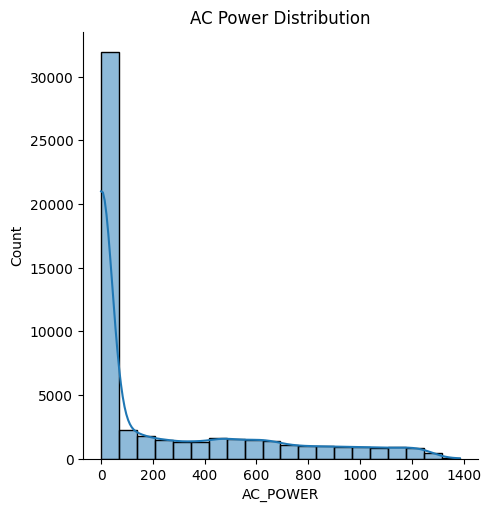

In [ ]:
sns.displot(y_valtrain, kde=True, bins = 20).set(title = "AC Power Distribution")
plt.show()

- In the above AC_POWER distribution we can see most of the data points collected are nearly zero. This is due to datapoints collected at night time and during maintenance periods.

Text(0.5, 1.0, 'AC Power vs. Total Yield')

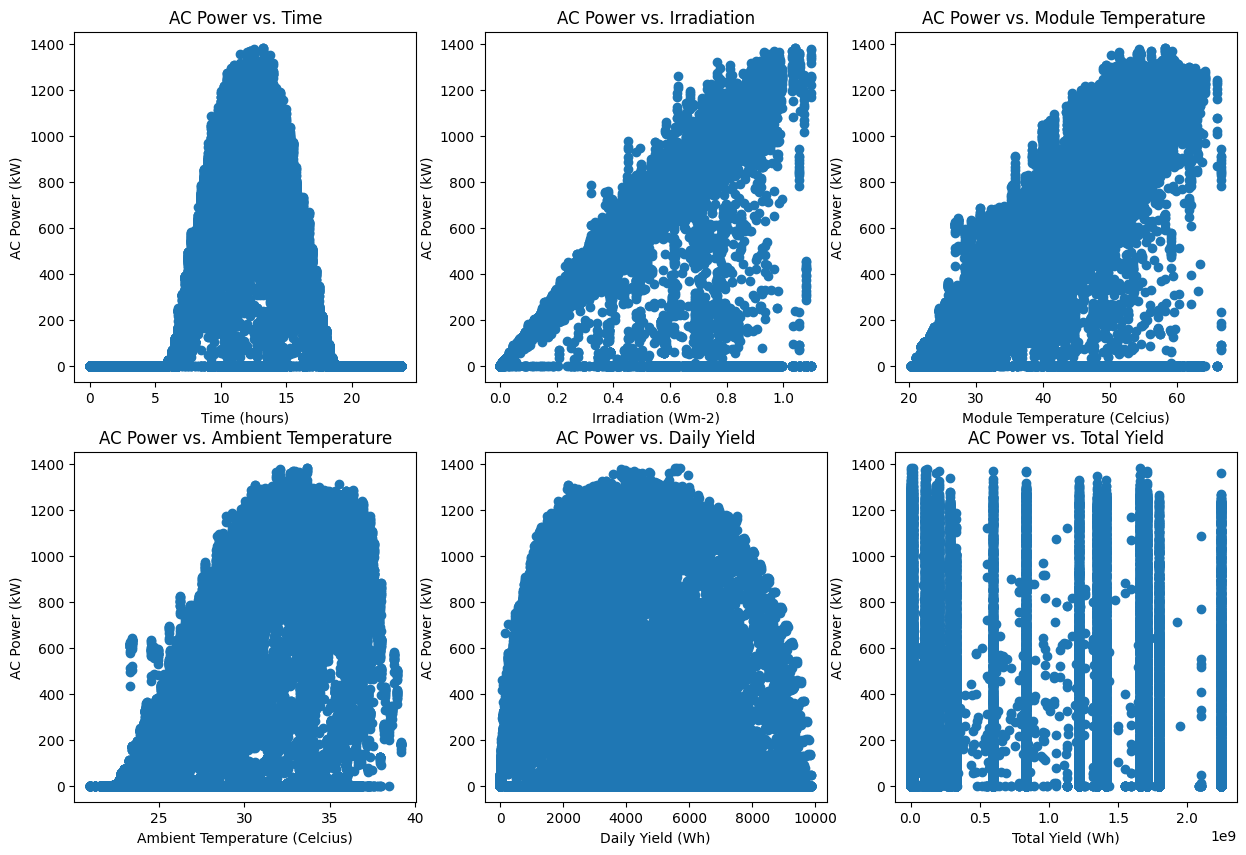

In [ ]:
#Plots for AC powe against input features
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))
axes[0,0].scatter(X_valtrain_EDA.TOTAL_MINUTES_PASS/60, y_valtrain)
axes[0,0].set_xlabel('Time (hours)')
axes[0,0].set_ylabel('AC Power (kW)')
axes[0,0].set_title('AC Power vs. Time')

axes[0,1].scatter(X_valtrain_EDA.IRRADIATION, y_valtrain)
axes[0,1].set_xlabel('Irradiation (Wm-2)')
axes[0,1].set_ylabel('AC Power (kW)')
axes[0,1].set_title('AC Power vs. Irradiation')

axes[0,2].scatter(X_valtrain_EDA.MODULE_TEMPERATURE, y_valtrain)
axes[0,2].set_xlabel('Module Temperature (Celcius)')
axes[0,2].set_ylabel('AC Power (kW)')
axes[0,2].set_title('AC Power vs. Module Temperature ')

axes[1,0].scatter(X_valtrain_EDA.AMBIENT_TEMPERATURE, y_valtrain)
axes[1,0].set_xlabel('Ambient Temperature (Celcius)')
axes[1,0].set_ylabel('AC Power (kW)')
axes[1,0].set_title('AC Power vs. Ambient Temperature')

axes[1,1].scatter(X_valtrain_EDA.DAILY_YIELD, y_valtrain)
axes[1,1].set_xlabel('Daily Yield (Wh)')
axes[1,1].set_ylabel('AC Power (kW)')
axes[1,1].set_title('AC Power vs. Daily Yield')

axes[1,2].scatter(X_valtrain_EDA.TOTAL_YIELD, y_valtrain)
axes[1,2].set_xlabel('Total Yield (Wh)')
axes[1,2].set_ylabel('AC Power (kW)')
axes[1,2].set_title('AC Power vs. Total Yield')


**Observations:**
- According to AC Power vs. Time graph, AC Power is generated during the day time (05:00-18:00 hours).
- We can observe a positive correlation for AC Power against Irradiation, Module Temperature, and Ambient Temperature.

- There are considerable amount of outliers in the plots of AC Power against Irradiation, Module Temperature, Ambient Temperature. Treating these outliers using methods like trimmming can cause information loss. Techniques like Capping and Imputation are used for relatively small datasets. Since this is a comparatively large dataset, applying those techniques can change the distribution. Therefore, the solution for this is to use a more robust model that is less sensitive to outliers. Also we can use `Median Absolute Error (MedAE)` as evaluation metric which is less sensitive to outliers.

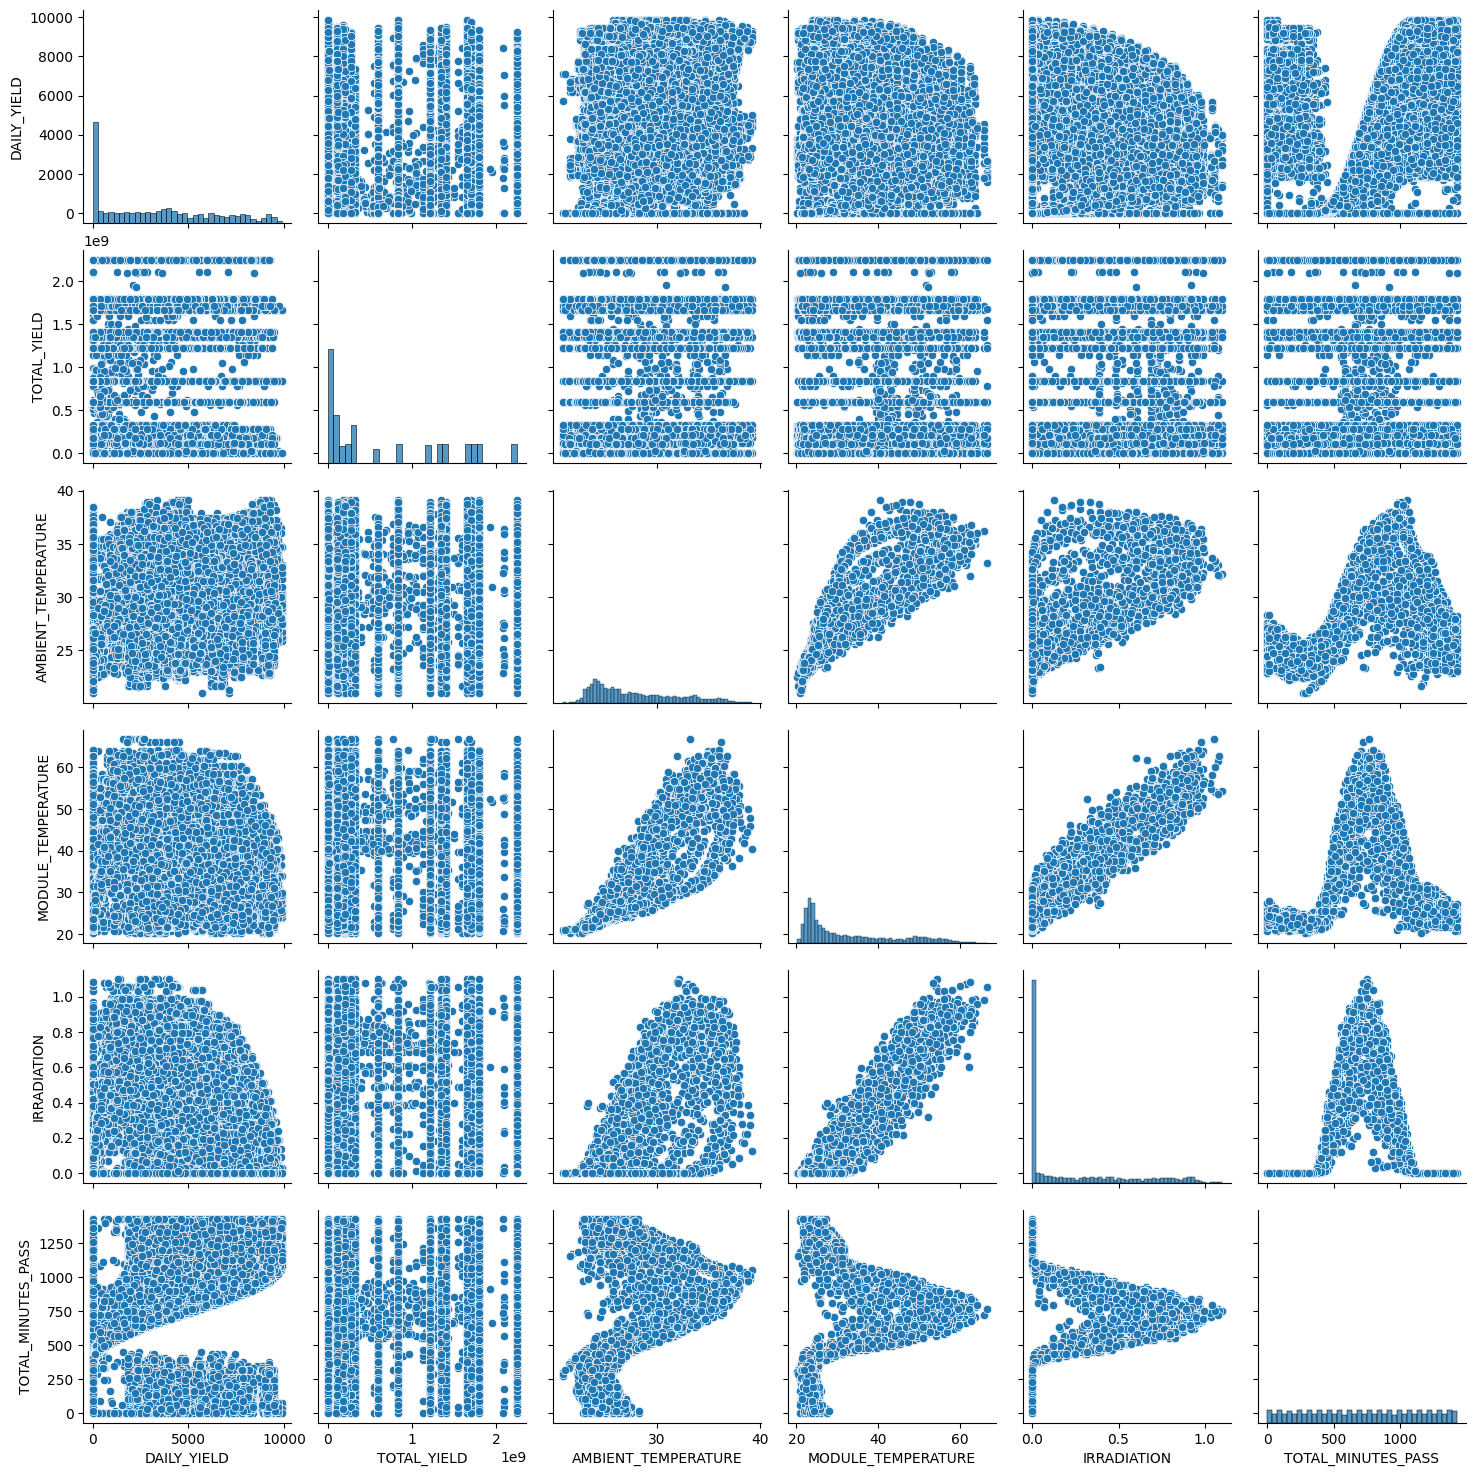

In [ ]:
sns.pairplot(X_valtrain_EDA) # pair plot

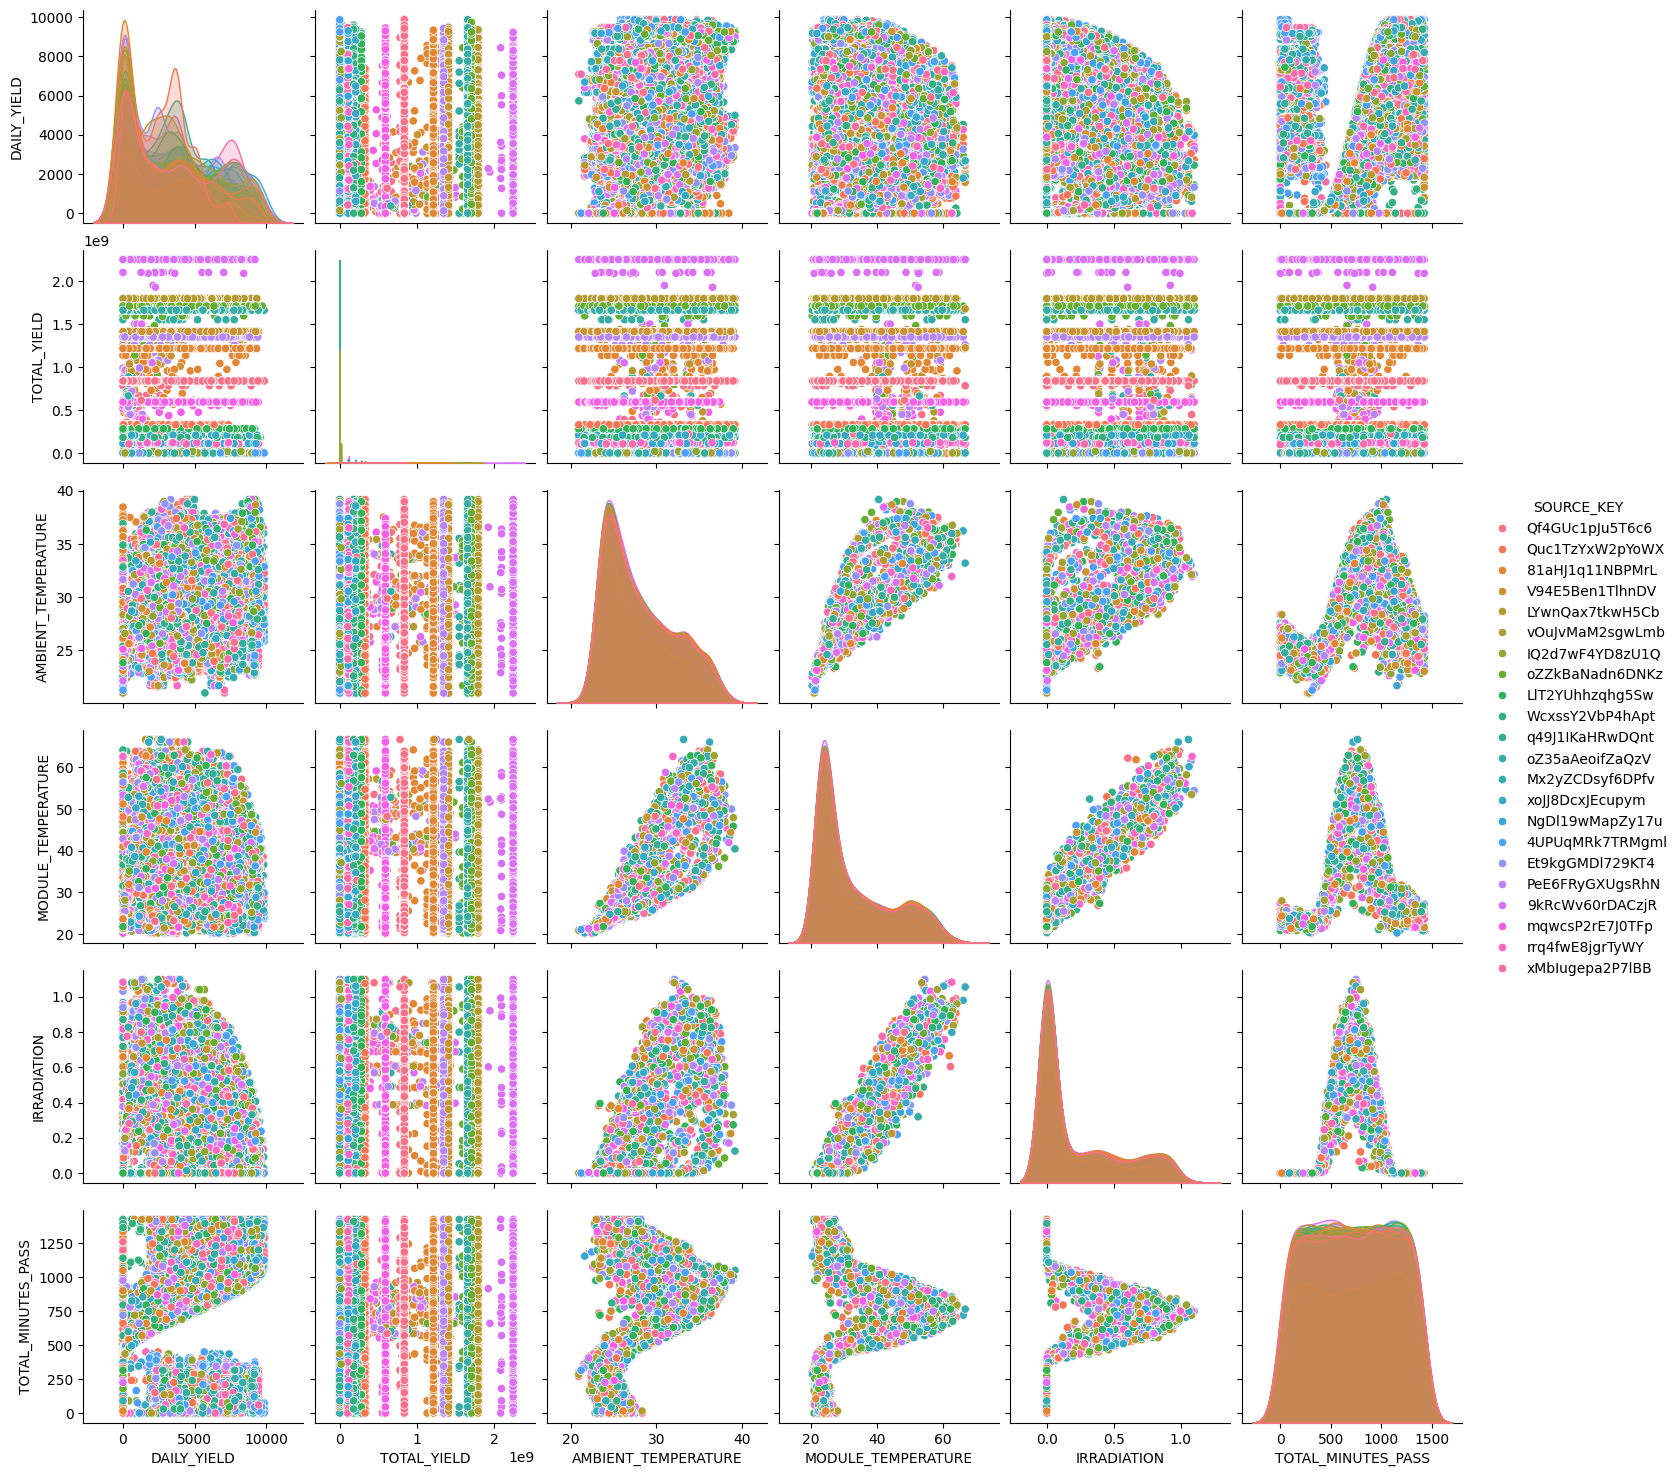

In [ ]:
sns.pairplot(X_valtrain_EDA, hue="SOURCE_KEY") #pair plot for each SOURCE_KEY

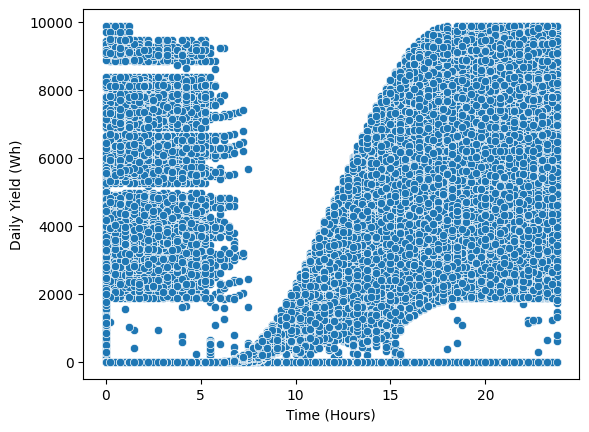

In [ ]:
sns.scatterplot(x=X_valtrain_EDA.TOTAL_MINUTES_PASS/60, y=X_valtrain_EDA.DAILY_YIELD) #x-axis is converted to hours
plt.xlabel("Time (Hours)")
plt.ylabel("Daily Yield (Wh)")
plt.show()

- According to above scatter plot, it can be observed that there are a considerable number of outliers between 0-7 hours. Since there is very low irradiation between this time period, the daily yield should be near zero.
- We can handle these outliers by **trimming**, but since there are a lot of data points, it will cause **information loss**.
- Another way is to manually assign a value to these outliers. But this may introduce **bias** and **overfitting**. Also, it will cause information loss.
- Even if outliers are caused by errors, understanding those errors is valuable for the model. Errors caused by these outliers would be compensated by other features like, irradiation, module_temperature, and ambient_temperature. Therefore, these outliers are kept unchanged.

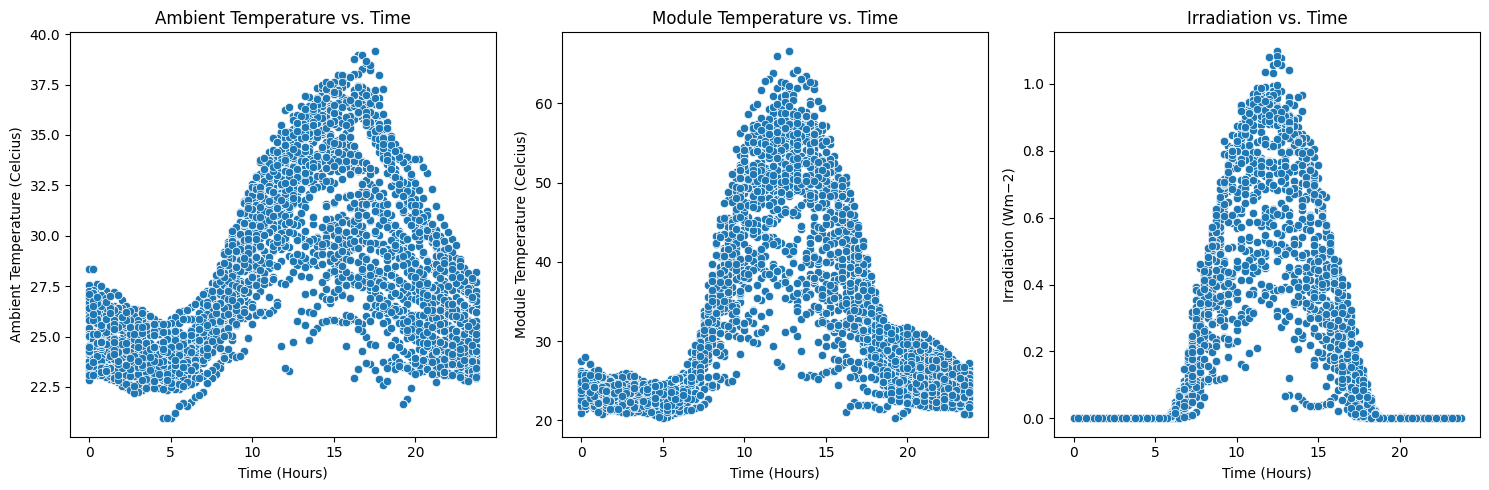

In [ ]:
#Plots for Time vs Ambient Temperature, Module Temperature, and Irradiation
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))
# Plot 1
sns.scatterplot(data=X_valtrain_EDA, x=X_valtrain_EDA.TOTAL_MINUTES_PASS/60, y='AMBIENT_TEMPERATURE', ax=axes[0])
axes[0].set_title("Ambient Temperature vs. Time")

# Plot 2
sns.scatterplot(data=X_valtrain_EDA, x=X_valtrain_EDA.TOTAL_MINUTES_PASS/60, y='MODULE_TEMPERATURE', ax=axes[1])
axes[1].set_title("Module Temperature vs. Time")

# Plot 3
sns.scatterplot(data=X_valtrain_EDA, x=X_valtrain_EDA.TOTAL_MINUTES_PASS/60, y='IRRADIATION', ax=axes[2])
axes[2].set_title("Irradiation vs. Time")

axes[0].set_xlabel("Time (Hours)")
axes[0].set_ylabel("Ambient Temperature (Celcius)")

axes[1].set_xlabel("Time (Hours)")
axes[1].set_ylabel("Module Temperature (Celcius)")

axes[2].set_xlabel("Time (Hours)")
axes[2].set_ylabel("Irradiation (Wm−2)")

plt.tight_layout()
plt.show()


According to above plots,
- Ambient temperature is high during 10-20 hours of the day.
- Module temperature is gets high during 7-20 hours of the day.
- Irradiation is ditributed 17-18 hours of the day.

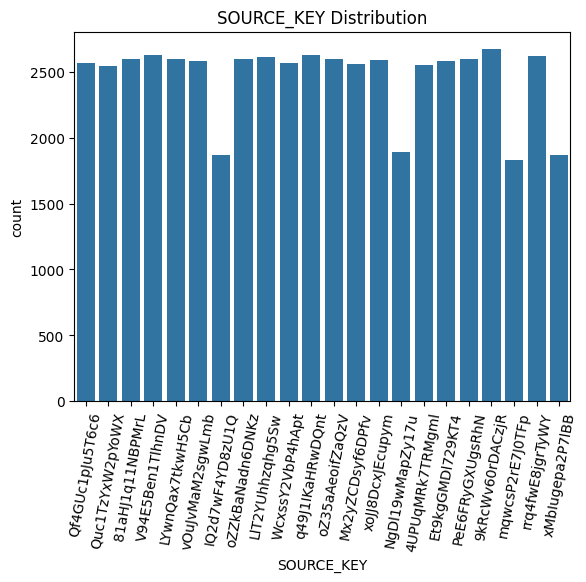

In [ ]:
#Check data distribution for each inverters
sns.countplot(x = X_valtrain_EDA.SOURCE_KEY).set(title = 'SOURCE_KEY Distribution')
plt.xticks(rotation=80)
plt.show()

- Above chart denotes the count of data points recoded from each inverter. According to that, it can be observed that there are more than 1500 data points for each inverter and they are nearly equal.
- This makes the dataset balanced. A balanced dataset helps the model learn the patterns of each category more fairly, resulting **Reduced Bias**. Then models become better at generalizing to new examples, resulting an **Improved Generalization**.

## Feature Scaling
- Here, standardization is used to perform feature scaling.
- Feature scaling helps to reduce dominance of features with large scales. Feature scaling could improve the performance of linear regression model. However, rendom forest regression models may be insensitive for it.

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

# We should only scale numerical features. Not encoded features!
features_to_scale = ['DAILY_YIELD','TOTAL_YIELD','AMBIENT_TEMPERATURE',	'MODULE_TEMPERATURE',	'IRRADIATION',	'TOTAL_MINUTES_PASS']
column_transformer = ColumnTransformer(
    transformers=[
        ('scaler', StandardScaler(), features_to_scale)
    ], remainder='passthrough'  # Leaves other columns unchanged
)

X_valtrain_scaled = column_transformer.fit_transform(X_valtrain) #Fit and transform with the training set
# Only transform the test set to avoid data leakage
X_test_scaled = column_transformer.transform(X_test)

# Create the DataFrames
X_valtrain_scaled_df = pd.DataFrame(X_valtrain_scaled, columns=X_valtrain.columns)
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X_test.columns)

#replace original train & test sets with scaled ones
X_valtrain = X_valtrain_scaled_df
X_test = X_test_scaled_df


# Implementing Linear Regression



## Linear Regression Model

In [ ]:
from sklearn.linear_model import LinearRegression

linear_regressor = LinearRegression() #LR model
linear_regressor.fit(X = X_valtrain,y = y_valtrain) #Fit training data

y_pred_train = linear_regressor.predict(X_valtrain) # Predictions for training set
y_pred_test = linear_regressor.predict(X_test) #Predictions for test set


In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

#---Training set metrics---#
lr_r2_train = r2_score(y_valtrain, y_pred_train) #R-squared for training set
lr_mae_train = mean_absolute_error(y_valtrain, y_pred_train)
lr_medae_train = median_absolute_error(y_valtrain, y_pred_train)
lr_rmse_train = np.sqrt(mean_squared_error(y_valtrain, y_pred_train))

#---Test set metrics---#
lr_r2_test = r2_score(y_test, y_pred_test) #R-squared for testing set
lr_mae_test = mean_absolute_error(y_test, y_pred_test)
lr_medae_test = median_absolute_error(y_test, y_pred_test)
lr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test))

# print(lr_r2_train, lr_r2_test)
# print(lr_mae_train, lr_mae_test)
# print(lr_medae_train, lr_medae_test)
# print(lr_rmse_train, lr_rmse_test)

lr_results = pd.DataFrame(
    {'Metric': ['R-squared', 'MAE', 'MedAE', 'RMSE'],
     'Training': [lr_r2_train, lr_mae_train, lr_medae_train, lr_rmse_train],
     'Testing': [lr_r2_test, lr_mae_test, lr_medae_test, lr_rmse_test]}
)

lr_results

Metric    Training     Testing
0  R-squared    0.639786    0.642355
1        MAE  130.726500  129.647362
2      MedAE   67.352009   67.972656
3       RMSE  217.492973  215.901076


**Observations**

* **Similar R-squared:** The R-squared values for the training (0.639) and testing (0.642) sets are very close to each other. This shows minimal overfitting. The model  generalize reasonably with unseen data.
* **Relatively High Errors:** MAE, MedAE, and RMSE are quite high.

* **Possible reasons for high errors:**

    * **Linearity:** Data does not have strictly linear relationships. Linear regression is restrictive to linear relationships.
  
    * **Model Complexity:**  More complex, non-linear models can be used to model the patterns in the dataset.


## K-Fold Cross Validation on Linear Regressor (based on R-Squared)

In [ ]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(estimator=linear_regressor, X = X_valtrain, y = y_valtrain, cv=10, scoring='r2') # we use 10 cross validation sets
print(f'Average: {scores.mean():.3f}')
print(f'Standard Deviation: {scores.std():.3f}')

Average: 0.639
Standard Deviation: 0.018


**Cross validation results:**

* **Average:** An average R-squared of 0.639 indicates the model explains about 63.9% of the variance in the target variable within different cross-validations.
* **Standard Deviation:** The relatively small standard deviation (0.018) shows the model's performance is fairly consistent across different folds of the dataset.

# Implementing Random Forest Regression

## Random Forest Regression Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor
random_forest_regressor = RandomForestRegressor(n_estimators=100, n_jobs=-1) #RFR model with 100 estimators
random_forest_regressor.fit(X = X_valtrain,y = y_valtrain) # Fit the training set
# y_pred_rfr = random_forest_regressor.predict(X_test) # Predict y for X_test

y_pred_train_rfr = random_forest_regressor.predict(X_valtrain) # Predictions for training set
y_pred_test_rfr = random_forest_regressor.predict(X_test) #Predictions for test set

In [ ]:
#---Training set metrics---#
rfr_r2_train = r2_score(y_valtrain, y_pred_train_rfr) #R-squared for training set
rfr_mae_train = mean_absolute_error(y_valtrain, y_pred_train_rfr) # Mean Absolute Error for training set
rfr_medae_train = median_absolute_error(y_valtrain, y_pred_train_rfr) # Median Absolute Error for training set
rfr_rmse_train = np.sqrt(mean_squared_error(y_valtrain, y_pred_train_rfr)) # Root Mean Squared Error for training set

#---Test set metrics---#
rfr_r2_test = r2_score(y_test, y_pred_test_rfr) #R-squared for test set
rfr_mae_test = mean_absolute_error(y_test, y_pred_test_rfr) # Mean Absolute Error for test set
rfr_medae_test = median_absolute_error(y_test, y_pred_test_rfr) # Median Absolute Error for test set
rfr_rmse_test = np.sqrt(mean_squared_error(y_test, y_pred_test_rfr)) # Root Mean Squared Error for test set

rfr_results = pd.DataFrame(
    {'Metric': ['R-squared', 'MAE', 'MedAE', 'RMSE'],
     'Training': [rfr_r2_train, rfr_mae_train, rfr_medae_train, rfr_rmse_train],
     'Testing': [rfr_r2_test, rfr_mae_test, rfr_medae_test, rfr_rmse_test]}
)

rfr_results

Metric   Training    Testing
0  R-squared   0.992220   0.946992
1        MAE   8.813134  23.289771
2      MedAE   0.048279   0.146950
3       RMSE  31.964024  83.118697

**Observations:**

* **Extremely High Training R-Squared:** The R-Squared of 0.992 on the training set says that the model is likely overfitting. It has learned training data too closely.

* **Lower Test R-Squared:** The drop to an R-Squared of 0.948 on the test set confirms overfitting. but it is still a good R-Squared value.

* **Low Errors:**  MAE, MedAE, and RMSE are now smaller for random forest model compared to the linear regression model, in both the training and testing sets. This indicates significantly improved model performance.

**Possible Improvements:**

* **Overfitting:** Random forest model is overfitting the training data. This usually happens when trees are grown too deeply or with too many features.

* We can use following options to reduce overfitting,

1. **Regularization:**
    * **Limit Tree Depth:** Controlling the `max_depth` parameter.
    * **Minimum Samples per Split/Leaf:** Using `min_samples_split` or `min_samples_leaf`.

2. **Hyperparameter Tuning:** Use of GridSearchCV to explore the best combination of hyperparameters to balance accuracy and reduce overfitting.


## Hyper-Parameter Tuning Using GridSearchCV (Based on R-Squared)

- we can explore the best combination of hyperparameters to balance accuracy and reduce overfitting.

- We use GridSearch to select the best parameters from a set of given parameters.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rf_reg = RandomForestRegressor(random_state=42)

param_grid = {
    # 'n_estimators':[50, 100, 200],
    'max_depth': [5 ,8, 10],
    'min_samples_split': [4, 5, 6],
    'min_samples_leaf':[2, 4, 6],
}

grid_search = GridSearchCV(rf_reg, param_grid, cv=5, scoring = 'r2', n_jobs = -1)
grid_search.fit(X_valtrain, y_valtrain)

best_model = grid_search.best_estimator_
print(best_model)

RandomForestRegressor(max_depth=10,min_samples_split=4, min_samples_leaf=2, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
# random_forest_regressor_2 = RandomForestRegressor(n_estimators=200, max_depth=10,min_samples_split=10, min_samples_leaf=5, random_state=42)
random_forest_regressor_2 = RandomForestRegressor(n_estimators=200, max_depth=10,min_samples_split=4, min_samples_leaf=2, random_state=42)

random_forest_regressor_2.fit(X_valtrain,y_valtrain) # Fit the training set

y_pred_train_rfr = random_forest_regressor_2.predict(X_valtrain) # Predictions for training set
y_pred_test_rfr = random_forest_regressor_2.predict(X_test) #Predictions for test set

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error, median_absolute_error

#---Training set metrics---#
rfr_r2_train_2 = r2_score(y_valtrain, y_pred_train_rfr) #R-squared for training set
rfr_mae_train_2 = mean_absolute_error(y_valtrain, y_pred_train_rfr) # Mean Absolute Error for training set
rfr_medae_train_2 = median_absolute_error(y_valtrain, y_pred_train_rfr) # Median Absolute Error for training set
rfr_rmse_train_2 = np.sqrt(mean_squared_error(y_valtrain, y_pred_train_rfr)) # Root Mean Squared Error for training set

#---Test set metrics---#
rfr_r2_test_2 = r2_score(y_test, y_pred_test_rfr) #R-squared for test set
rfr_mae_test_2 = mean_absolute_error(y_test, y_pred_test_rfr) # Mean Absolute Error for test set
rfr_medae_test_2 = median_absolute_error(y_test, y_pred_test_rfr) # Median Absolute Error for test set
rfr_rmse_test_2 = np.sqrt(mean_squared_error(y_test, y_pred_test_rfr)) # Root Mean Squared Error for test set

rfr_results_2 = pd.DataFrame(
    {'Metric': ['R-squared', 'MAE', 'MedAE', 'RMSE'],
     'Training': [rfr_r2_train_2, rfr_mae_train_2, rfr_medae_train_2, rfr_rmse_train_2],
     'Testing': [rfr_r2_test_2, rfr_mae_test_2, rfr_medae_test_2, rfr_rmse_test_2]}
)

rfr_results_2

Metric   Training    Testing
0  R-squared   0.943394   0.924513
1        MAE  28.131600  31.509523
2      MedAE   0.484109   0.412986
3       RMSE  86.217863  99.189162

# Analysis of Results


* We use following evaluation metrics to compare model performance,

 1. **Mean Absolute Error (MAE):**
   * Calculates the average of the absolute differences between predicted and actual values.
   * Less sensitive to outliers than MSE/RMSE.

 2. **Root Mean Squared Error (RMSE):**
   * Tihs is quare root of MSE (Mean Squared Error). RMSE makes errors easier to interpret in the same units as the target variable.
   * Sensitive to outliers.

 3. **R-Squared (R²):**
   * Represents the proportion of variance in the dependent variable explained by the independent variables.
   * Ranges from 0 to 1, with higher values indicating a better fit.

 4. **Median Absolute Error (MedAE):**
   * Similar to MAE but uses the median instead of the mean, making it more robust to outliers.

* We mainly focus on **R-Squared**, **MAE**  and **MedAE**.

* **R-Squared** is a good indicator of fitting of the model (overfit/underfit) while **MAE** is more robust for outliers, as there are outliers in the datast. **MedAE** gives an idea of the error distribution.



### Results for the Linear Regression Model
`Table 01: Metrics of the Multiple Linear Regression Model`

|Metric|Training|Testing|
|---|---|---|
|R-squared|0\.6397859029919349|0\.6423571269005164|
|MAE|130\.72509222128542|129\.64543946612227|
|MedAE|67\.35109374999999|67\.99786458333335|
|RMSE|217\.4929570417021|215\.90048141126658|

- According to `Table 01`, the R-squared values for the training (0.639) and testing (0.642) sets are very close to each other. This shows minimal overfitting. The model generalize reasonably with unseen data. But MAE, MedAE, and RMSE are quite high. Reasons for that can be,
 * **Non Linearity**: Data does not have strictly linear relationships. Linear regression is only good for linear relationships.
 * **Model Complexity**: Linear regression model cannot identify complex patterns in the training set. Hence, more complex, non-linear models should be used to identify the patterns in this dataset.


### Results for Random Forest Regression Model (n_estimators=100)

`Table 02: Metrics for Random Forest Regression Model (n_estimators=100)`


|Metric|Training|Testing|
|---|---|---|
|R-squared|0\.9921901540077463|0\.948170699428466|
|MAE|8\.851793444112818|23\.058551097860164|
|MedAE|0\.04665000000005039|0\.1536547619047961|
|RMSE|32\.02477450275501|82\.18953005566023|

* **Extremely High Training R-Squared**: The R-Squared of 0.992 on the training set says that the model is likely overfitting. It has learned training data too closely.

* **Lower Test R-Squared**: The drop to an R-Squared of 0.948 on the test set confirms overfitting. but it is still a good R-Squared value.

* **Low Errors**: MAE, MedAE, and RMSE are now smaller for random forest model compared to the linear regression model, in both the training and testing sets. This indicates significantly improved model performance.

This Random forest model is overfitting the training data. This usually happens when trees are grown too deeply or with too many features. We can use regularization and hyper-parameter tuning to reduce overfitting,


* **Limit Tree Depth**: Controlling the max_depth parameter.
* **Minimum Samples per Split/Leaf**: Using min_samples_split or min_samples_leaf.



## Results for Tuned Random Forest Regressor using GridSearchCV (based on R-Squared)
`Table 03: Metrics for Tuned Random Forest Regression Model`

|Metric|Training|Testing|
|---|---|---|
|R-squared|0\.9433936931948539|0\.9245132385842356|
|MAE|28\.13160037914532|31\.509523181331783|
|MedAE|0\.4841087704980307|0\.41298621576550865|
|RMSE|86\.21786334834772|99\.1891617071883|

- Tuned random forest model shows an improvement in the gap between training and testing R-squared (0.943 vs. 0.924). This implies a reduced overfitting.

- But it caused an increase in other error metrics, MAE, MedAE and RMSE.


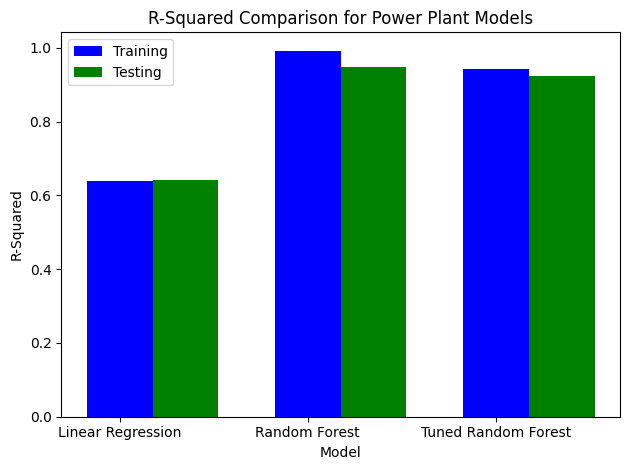

In [ ]:
# Comparison of R-Squared values of each models
models = ['Linear Regression', 'Random Forest', 'Tuned Random Forest']
r2_train = [lr_results.loc[0, 'Training'], rfr_results.loc[0, 'Training'], rfr_results_2.loc[0, 'Training']]
r2_test = [lr_results.loc[0, 'Testing'], rfr_results.loc[0, 'Testing'], rfr_results_2.loc[0, 'Testing']]
bar_width = 0.35
train_pos = [i for i, _ in enumerate(models)]
test_pos = [x + bar_width for x in train_pos]
plt.bar(train_pos, r2_train, color='blue', width=bar_width, label='Training')
plt.bar(test_pos, r2_test, color='green', width=bar_width, label='Testing')
plt.xlabel('Model')
plt.ylabel('R-Squared')
plt.title('R-Squared Comparison for Power Plant Models')
plt.xticks(train_pos, models)
plt.legend()
plt.tight_layout()
plt.show()

- **Linear regression model**: R-squared value for both training and testing sets are close to each other providing less overfit. But overall values are lower compared to random forest models.
- **Random forest model**: Very high trainig r-squared value says a higher overfitting. The gap between training and testing r-squared values confirms it.

- **Tuned random forest model**: The gap between training and testing r-squared values is now lower, implying a reduced overfit.




## Conclusion
- The hyper-parameter tuned random forest model works best compared to the linear regression model, in terms of R-squared, MAE, and MedAE. This shows it has better ability to predict future power output. But the tuning of this model was priortized on r-squared value. Therefore, it slightly increased other error metrics MAE, MedAE, and RMSE compared to traditional random forest model.